In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib
import time
import datetime
from IPython import display
import random



data_directory = 'D:\\Deletar\\pictures'
test_directory = 'C:\\Files\\manga\\argurmented'
tf.random.set_seed(42) 
SIZE = [512,512]

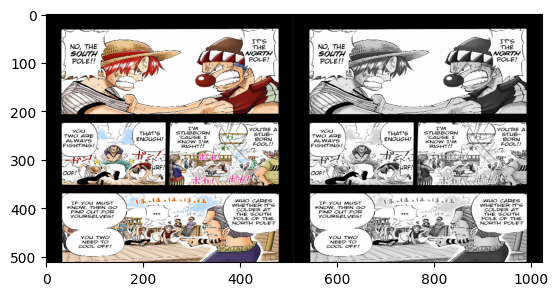

In [2]:
def resize_image(data):
    resized_img = tf.image.resize(
    images=data,
    size=SIZE,
    method=tf.image.ResizeMethod.BILINEAR,
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
    )    
    return resized_img

cont = 0

def save_f(img,filename):
    rdn = random.uniform(0, 1)
    dir_save = ""
    if (0.66 > rdn):
        dir_save = f"{test_directory}\\train\\{filename}.jpg"
    elif (0.82 > rdn):
        dir_save = f"{test_directory}\\test\\{filename}.jpg"
    else:
         dir_save = f"{test_directory}\\val\\{filename}.jpg"
    tf.keras.preprocessing.image.save_img(dir_save, img)
    

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        global cont
        try:
            img1 = resize_image(plt.imread(os.path.join(folder,filename)))
            img2 =  tf.image.rgb_to_grayscale(img1)
            img2 = np.concatenate((img2,img2,img2),axis=-1)
            img_merged = tf.concat([img1, img2], 1)
            if img_merged is not None:
                save_f(img_merged,filename)
                images.append(img_merged)
        except:
            cont = cont + 1
    return images

X_test = load_images_from_folder(data_directory)

plt.imshow(np.array(X_test[0], dtype=int))
